Setup: common imports

In [1]:
# importing modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-06-24 22:38:44.078096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data Collection & Processing

In [2]:
# read the data 
breast_cancer_dataset = pd.read_csv("breast cancer.csv")

In [3]:
print(breast_cancer_dataset) 

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

Let’s take a look at the top 5 rows using the DataFrame using head() method.<br>
Each row represents one person and its attributes.

In [4]:
# print the first 5 rows of the dataframe
breast_cancer_dataset.head()                                           

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let’s take a look at the last 5 rows using the DataFrame using tail() method.<br>
Each row represents one person and its attributes.

In [5]:
# print last 5 rows of the dataframe
breast_cancer_dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Printing dataset's shape(rows, columns)

In [6]:
# number of rows and columns in the dataset
breast_cancer_dataset.shape

(569, 32)

The info() method is useful to get a quick description of the data, in particular the<br>
total number of rows, and each attribute’s type and number of non-null values. 

In [7]:
# getting some information about the data
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The code below returns a Series that sums up the number of True values (missing values)<br> 
in each column of the boolean DataFrame. The purpose is to check how many missing values are<br>
present in each column.

In [8]:
breast_cancer_dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the<br>
numerical attributes and statistical measures.

In [9]:
# statistical measures about the data
breast_cancer_dataset.describe() 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The purpose of this code is to check how many samples in the dataset have<br> malignant or benign breast cancer.

In [10]:
# checking the distribution of Target Varibale
breast_cancer_dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

replacing diagnosis column with numerical values:<br>

Benign --> 0<br>
Malignant --> 1


In [11]:
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis'].replace({'B': 0, 'M': 1})

In [12]:
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The purpose of this code is to check how many samples in the dataset have<br> malignant or benign breast cancer.

In [13]:
# checking the distribution of Target Varibale
breast_cancer_dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Checking the mean values of each feature between malignant and<br>
benign samples. It shows the importance and relevance of each feature.

In [14]:
breast_cancer_dataset.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Droping "ID" column cause it's irrelavent and doesn't give valuable information.

In [15]:
breast_cancer_dataset = breast_cancer_dataset.drop("id" , axis=1)

In [16]:
breast_cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Separating the features(X) and the target(Y)

In [17]:
X = breast_cancer_dataset.drop(columns = "diagnosis" , axis=1)
Y = breast_cancer_dataset["diagnosis"]

In [18]:
X.shape

(569, 30)

In [19]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Feature Scaling<br>
Normalizing the data using MinMaxScaler() class between 0 and 1.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaled2 = scaler1.fit_transform(X)
X_norm = pd.DataFrame(scaled2, columns=X.columns)
X_norm.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


extractor feature

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

Finding out which features are most relavent for predicting<br>
breast cancer diagnosis, and reducing the dimensionality of<br>
the data.<br>
- The RandomForestRegressor class creates a regression model based on<br>
multiple dicision trees.<br><br>
- random_state argument of 0 will ensure that the model is reproducible<br>
and consistent.<br><br>
- The zip function pairs each feature name with its corresponding importance<br>
value.<br><br>
- The RFECV class performs recursive feature elimination with cross-validation.<br>
Validation strategy is 5-fold-cross-validation(cv=5) and the evaluation metric<br>
is negatice mean squared error(scoring="neg_mean_squared_error").<br><br>
- rfe.get_support() returns a boolean array indicating which features are selected<br>
by rfe.

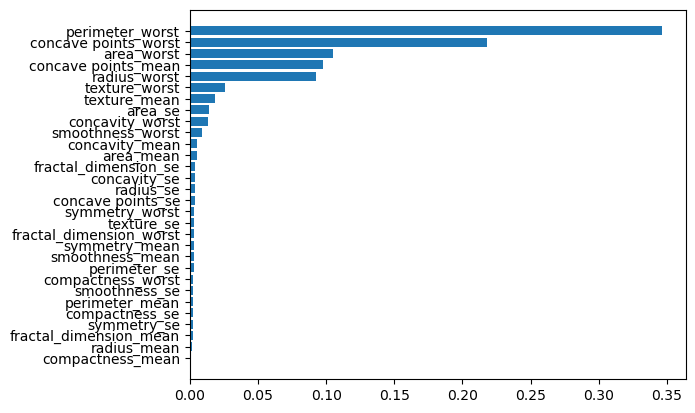

['texture_mean' 'concave points_mean' 'area_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'concavity_worst' 'concave points_worst']


In [23]:
features = X_norm.columns
rf = RandomForestRegressor(random_state=0)
rf.fit(X_norm,Y)
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_norm,Y)
selected_features = np.array(features)[rfe.get_support()]
print(selected_features)

Creating a new dataframe with fewer features(selected features)

In [24]:
X_selected = X_norm[selected_features]

In [25]:
X_selected.shape

(569, 11)

Splitting the data into training data & Testing data<br>
- test_size=0.2 means that 20% of the data is for test set<br>
and 80% is for train set.<br><br>
- random_state=2 means that it uses 2 as the seed for the random<br>
number generator to ensure reproducibility.<br>

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=2)

In [27]:
print(X_selected.shape, X_train.shape, Y_train.shape, X_test.shape)

(569, 11) (455, 11) (455,) (114, 11)


**Building the Neural Network**

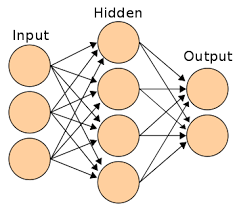

In [80]:
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

Building the neural network:<br>
- The sequential model takes a list of layers as an argument.<br><br>
- Flatten layer transforms the input data into a one-dimensional vector.<br>
The shape of input layer is the number of features.<br><br>
- The nueral network has only one hidden layer with 12 nodes and ReLU<br>
as it's activation function. It returns the maximum of zero and the input value.<br>
ReLU is common in MLPs. some of the reasons are:<br>
    - It's computationally simple and efficient.<br>
    - It overcomes the vanishing gradient problem.<br>  
    - It can learn more complex and nonlinear patterns in the data.<br><br>
- The output layer of the model has 2 nodes and uses sigmoid activation function<br>
because we have a binary classification.<br><br>

In [81]:
model = keras.Sequential([
                        #input layer
                        keras.layers.Flatten(input_shape=(X_train.shape[1],)),

                        #dense layer 1
                        keras.layers.Dense(12, activation='relu'),

                        #output layer
                        keras.layers.Dense(2, activation='sigmoid')
                        

])

Model Compiling<br>
Means to specify how the model will be trained and evaluated.<br>
- Adam is used as optimizer. Learning rate is considered 0.01.<br><br>
- The loss function quantifies the difference between the actual output<br>
and the predicted output of the model.'sparse_categorical_crossentropy'is used.<br><br>
- The metrics argument specifies which metrics to use for evaluating the performance<br>
of the model which we used 'accuracy'.

In [82]:
adamOpti = Adam(learning_rate = 0.01)
model.compile(optimizer=adamOpti,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Here we created a callback object using EarlyStopping class.<br>
A callback is a function that can be executed at certain points during<br>
the training process, such as at the end of each epoch. EarlyStopping is a<br>
type of callback that can stop the training process when a certain condition<br>
is met, such as when the validation loss stops improving.<br>
- The monitor argument specifies which metric to monitor for early stopping.<br>
We chose validation loss.<br><br>
- The mode argument specifies whether to stop the training when the monitored<br>
metric increases or decreases. We chose decrease(model improving).<br><br>
- he verbose argument specifies how much information to display during<br>
the training process. 1 means a message will be printed when the training is stopped.<br><br>
- The patience argument specifies how many epochs to wait before stopping the training<br>
after the monitored metric stops improving. We chose to wait for 10 epochs, which means<br>
that if the validation loss does not decrease for 10 consecutive epochs, the training will be stopped.<br><br>
- The restore_best_weights argument specifies whether to restore the model weights to the best values<br>
found during the training process. "True" means the model will have the weights that correspond to<br>
the lowest validation loss.



In [83]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

Training the model<br>
- epochs=100 --> the model will go through 100 epochs of training.<br><br>
- batch_size=455 --> the model will use 455 samples in each gradient update.<br><br>
- validation_split=0.2 --> 20% of the training data will be used as validation<br>
data. It prevents overfitting.<br><br>
- callbacks=[es] --> the early stopping callback object we created earlier.<br>

In [84]:
history = model.fit(X_train, Y_train, epochs=100,
          batch_size=455,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
1/1 [==============================] - 1s 599ms/step - loss: 0.6832 - accuracy: 0.3874 - val_loss: 0.6740 - val_accuracy: 0.5275
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 0.6756 - accuracy: 0.5220 - val_loss: 0.6670 - val_accuracy: 0.6154
Epoch 3/100
1/1 [==============================] - 0s 115ms/step - loss: 0.6681 - accuracy: 0.6209 - val_loss: 0.6596 - val_accuracy: 0.7363
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.6601 - accuracy: 0.6923 - val_loss: 0.6519 - val_accuracy: 0.7473
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6518 - accuracy: 0.7555 - val_loss: 0.6435 - val_accuracy: 0.7802
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6428 - accuracy: 0.7967 - val_loss: 0.6342 - val_accuracy: 0.7912
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6331 - accuracy: 0.8352 - val_loss: 0.6242 - val_accuracy: 0.8462
Epoch 8/100
1/1 [=

In the next model epochs has remained 100 but learning_rate is changed to 0.1.

In [72]:
adamOpti = Adam(learning_rate = 0.1)
model.compile(optimizer=adamOpti,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history2 = model.fit(X_train, Y_train, epochs=100,
          batch_size=455,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 1.0592 - val_accuracy: 0.7802
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 0.9471 - accuracy: 0.7445 - val_loss: 0.1204 - val_accuracy: 0.9451
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0869 - accuracy: 0.9588 - val_loss: 0.1342 - val_accuracy: 0.9451
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 0.1848 - accuracy: 0.9478 - val_loss: 0.4535 - val_accuracy: 0.8791
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 0.5084 - accuracy: 0.8846 - val_loss: 0.4034 - val_accuracy: 0.8901
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 0.4533 - accuracy: 0.8874 - val_loss: 0.1740 - val_accuracy: 0.9341
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2161 - accuracy: 0.9451 - val_loss: 0.0420 - val_accuracy: 0.9780
Epoch 8/100
1/1 [==

We can see that increasing learning rate while maintaining epochs led to lower accuracy. A point worth mentioning is<br>
that this model early stopped at epoch 24.

In the next model learning_rate will remain 0.01 and epochs will change to 10.

In [41]:
adamOpti = Adam(learning_rate = 0.01)
model.compile(optimizer=adamOpti,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history3 = model.fit(X_train, Y_train, epochs=10,
          batch_size=455,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/10
1/1 [==============================] - 1s 770ms/step - loss: 0.1545 - accuracy: 0.9368 - val_loss: 0.1447 - val_accuracy: 0.9560
Epoch 2/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1146 - accuracy: 0.9533 - val_loss: 0.1041 - val_accuracy: 0.9560
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 0.0870 - accuracy: 0.9643 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 4/10
1/1 [==============================] - 0s 43ms/step - loss: 0.0696 - accuracy: 0.9725 - val_loss: 0.0585 - val_accuracy: 0.9780
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0595 - accuracy: 0.9835 - val_loss: 0.0503 - val_accuracy: 0.9890
Epoch 6/10
1/1 [==============================] - 0s 45ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0489 - val_accuracy: 0.9890
Epoch 7/10
1/1 [==============================] - 0s 91ms/step - loss: 0.0558 - accuracy: 0.9863 - val_loss: 0.0517 - val_accuracy: 0.9780
Epoch 8/10
1/1 [==========

We can see that lowering epochs caused lower accuracy, However it still has a<br>
good performance cause learning_rate remained 0.01.

In [61]:
adamOpti = Adam(learning_rate = 0.1)
model.compile(optimizer=adamOpti,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
history4 = model.fit(X_train, Y_train, epochs=10,
          batch_size=455,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/10
1/1 [==============================] - 1s 564ms/step - loss: 0.0580 - accuracy: 0.9863 - val_loss: 0.3456 - val_accuracy: 0.8901
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 0.2859 - accuracy: 0.9038 - val_loss: 0.0621 - val_accuracy: 0.9890
Epoch 3/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0600 - accuracy: 0.9753 - val_loss: 0.0651 - val_accuracy: 0.9560
Epoch 4/10
1/1 [==============================] - 0s 41ms/step - loss: 0.0931 - accuracy: 0.9643 - val_loss: 0.1386 - val_accuracy: 0.9451
Epoch 5/10
1/1 [==============================] - 0s 44ms/step - loss: 0.1712 - accuracy: 0.9451 - val_loss: 0.1062 - val_accuracy: 0.9560
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 0.1346 - accuracy: 0.9533 - val_loss: 0.0492 - val_accuracy: 0.9670
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0694 - accuracy: 0.9780 - val_loss: 0.0398 - val_accuracy: 0.9890
Epoch 8/10
1/1 [==========

We can see that changing both epochs and learning_rate to 10 and 0.1 led to lower accuracy.

Overall we can see that changing hyperparameters like epochs and learning_rate<br>
can affect model's performance.

The best model was the first one with 100 epochs and 0.01 as it's learning rate.<br>
So from now on we're going to use the first model as our main model named "history".<br><br>
Visualizing accuracy and loss based on epochs, comparing model's performance<br>
on validation data and training data

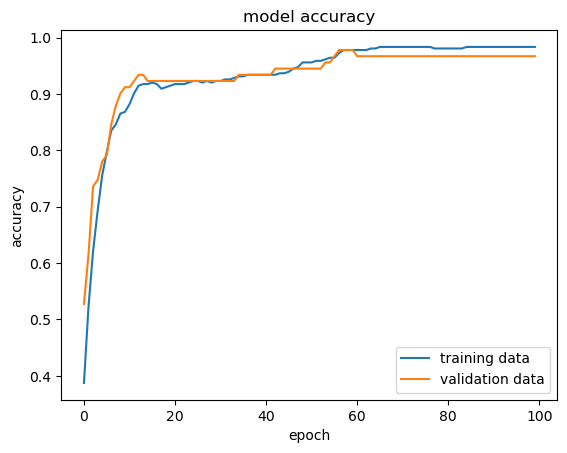

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

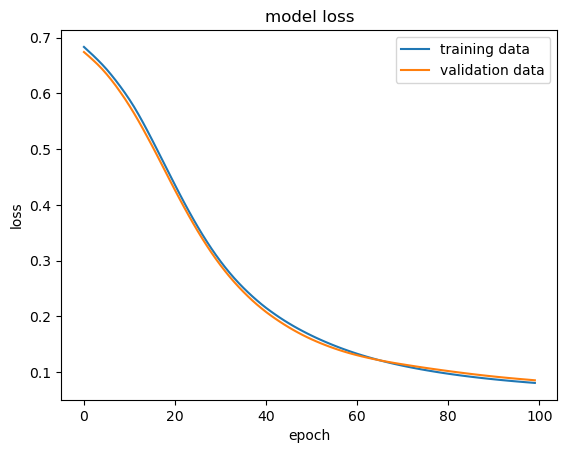

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Calculating the Accuracy of the model on test data

In [90]:
loss, accuracy = model.evaluate(X_test , Y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9737
0.9736841917037964


model.predict() gives the prediction probability of each class for that data point.

In [91]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [92]:
print(Y_pred.shape)

(114, 2)


In [93]:
print(Y_pred)

[[8.50038052e-01 1.21208064e-01]
 [4.77186501e-01 3.73786896e-01]
 [9.50303137e-01 2.43963432e-02]
 [1.08106455e-04 9.99739468e-01]
 [5.20821810e-01 3.53609681e-01]
 [2.20919074e-03 9.95230258e-01]
 [8.08215261e-01 1.01107672e-01]
 [9.40035522e-01 3.73968147e-02]
 [8.51800740e-01 8.33111703e-02]
 [8.77098083e-01 8.90647247e-02]
 [2.89677471e-01 5.21924078e-01]
 [7.21787632e-01 1.17812954e-01]
 [8.21362853e-01 1.23669304e-01]
 [6.74293101e-01 1.86823159e-01]
 [9.10610616e-01 4.91113253e-02]
 [5.97266927e-02 9.28603411e-01]
 [8.99280488e-01 5.25488369e-02]
 [9.54580128e-01 2.98654437e-02]
 [9.26693380e-01 5.42597882e-02]
 [8.12442508e-03 9.80675399e-01]
 [9.80865717e-01 1.67136285e-02]
 [9.41543400e-01 3.29652280e-02]
 [8.72989178e-01 6.85270056e-02]
 [9.41265285e-01 4.08344418e-02]
 [7.69748628e-01 1.87869236e-01]
 [2.03432515e-02 9.67557132e-01]
 [8.15443754e-01 1.00074522e-01]
 [6.28333092e-01 2.96497077e-01]
 [3.25890668e-02 9.55122769e-01]
 [1.70829017e-02 9.70746636e-01]
 [7.352555

The purpose of the code below is to convert probabilities predicted to calss labels 0 and 1.

In [94]:
# converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


Let's show the result of first 10 predictions.

In [97]:
Y_pred_labels[0:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

Let's see the real classes of the first 10 people.

In [98]:
Y_test.head(10)

528    0
291    0
467    0
108    1
340    0
256    1
160    0
306    0
155    0
511    0
Name: diagnosis, dtype: int64

All 10 predictions were correct!

In [99]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

Here we're showing Precision, Recall, F1-Score, and Accuracy<br>
of both classes 0 and 1 

In [101]:
print(classification_report(Y_test, Y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



"cm" is the variable for our Confusion Matrix.<br>
Accuracy, Precision, Recall, and f1_Score are evaluation metrics used by related functions from sklearn.metrics.

In [102]:
cm_DT = confusion_matrix(Y_test, Y_pred_labels)
accuracy_DT = accuracy_score(Y_test, Y_pred_labels)
precision_DT = precision_score(Y_test, Y_pred_labels, average='weighted')
recall_DT = recall_score(Y_test, Y_pred_labels, average='weighted')
f1score_DT = f1_score(Y_test, Y_pred_labels, average='weighted')

To show TrueNegatives, FalsePositives, FalseNegatives, and TruePositives in a linear order.(confusion matrix)

In [103]:
tn_DT, fp_DT, fn_DT, tp_DT = confusion_matrix(Y_test, Y_pred_labels).ravel()
tn_DT, fp_DT, fn_DT, tp_DT

(69, 0, 3, 42)

Print the evatuatiion metrics

In [104]:
print(f"Accuracy_DT = {accuracy_DT}")
print(f"Precision_DT = {precision_DT}")
print(f"Recall_DT = {recall_DT}")
print(f"F1 Score_DT = {f1score_DT}")

Accuracy_DT = 0.9736842105263158
Precision_DT = 0.9747807017543859
Recall_DT = 0.9736842105263158
F1 Score_DT = 0.9735104452253156
